# Self Organizing Map

This tutorial correspond to the section 16 (building a SOM) of DEEP LEARNING A-Z from https://www.udemy.com/deeplearning

![SOM Space](som_dimensional_space.png)

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset

The dataset is from http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval).

In [13]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Feature Scaling

Normalization: $x_{new} = \frac{x - x_{min}}{x_{max}-x_{min}}$

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

The MiniSom library is located here: https://github.com/JustGlowing/minisom

In [18]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5,random_seed=10)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


## Visualizing the results

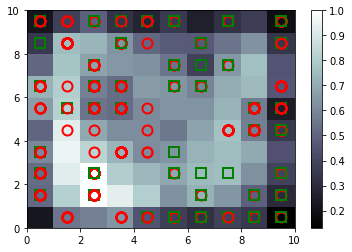

In [19]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

![SOM Steps](steps_som.png)

## Finding the frauds

In [25]:
mappings = som.win_map(X)

Now we look at the positions where the cheaters are and also the approvers, so we can prevent these potential cheaters.

In [34]:
frauds = np.concatenate((mappings[(0,9)], mappings[(7,0)]), axis = 0)

In [35]:
frauds = sc.inverse_transform(frauds)

In [37]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15590434.0,0.0,25.00,0.875,2.0,14.0,8.0,1.040,1.0,0.0,0.0,1.0,2.0,160.0,5861.0
1,15671014.0,0.0,25.33,2.085,2.0,8.0,8.0,2.750,1.0,0.0,0.0,1.0,2.0,360.0,2.0
2,15593345.0,0.0,38.58,5.000,2.0,13.0,4.0,13.500,1.0,0.0,0.0,1.0,2.0,980.0,1.0
3,15717700.0,0.0,23.58,0.830,2.0,11.0,4.0,0.415,0.0,1.0,1.0,1.0,2.0,200.0,12.0
4,15790254.0,0.0,18.92,9.000,2.0,6.0,4.0,0.750,1.0,1.0,2.0,0.0,2.0,88.0,592.0
5,15801441.0,0.0,35.75,0.915,2.0,6.0,4.0,0.750,1.0,1.0,4.0,0.0,2.0,0.0,1584.0
6,15788131.0,0.0,29.50,0.460,2.0,4.0,4.0,0.540,1.0,1.0,4.0,0.0,2.0,380.0,501.0
7,15699963.0,0.0,64.08,0.165,2.0,1.0,1.0,0.000,1.0,1.0,1.0,0.0,2.0,232.0,101.0
8,15698749.0,0.0,56.50,16.000,2.0,5.0,1.0,0.000,1.0,1.0,15.0,0.0,2.0,0.0,248.0
9,15764841.0,0.0,20.42,7.500,2.0,4.0,4.0,1.500,1.0,1.0,1.0,0.0,2.0,160.0,235.0
